# Plot the "theoretical performance" figure

- Load table from './results_plot/fig_fake_acc.csv'
- **[Warning]:** The font "Times New Roman" is only supported in Microsoft Windows OS!

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate


In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)


c:\Users\lukex\workspace\diva_01


In [3]:
PATH_OUTPUT = os.path.join(PATH_ROOT, "results_plot")
print(PATH_OUTPUT)


c:\Users\lukex\workspace\diva_01\results_plot


In [4]:
df = pd.read_csv(os.path.join(PATH_OUTPUT, 'fig_fake_acc.csv'))
df

,x,y_train_a,y_test_a,y_train_b,y_test_b
0,0.000,0.95,0.949,0.501,0.5
1,0.004,0.95,0.932,0.518,0.5
2,0.008,0.95,0.915,0.535,0.5
3,0.012,0.95,0.899,0.551,0.5
4,0.016,0.95,0.884,0.566,0.5
...,...,...,...,...,...
95,0.384,0.95,0.510,0.940,0.5
96,0.388,0.95,0.509,0.941,0.5
97,0.392,0.95,0.509,0.941,0.5
98,0.396,0.95,0.509,0.941,0.5


In [5]:
FONTSIZE = 13 / 0.8
FIGSIZE = (6, 2)
LINEWIDTH = 2.5 / 0.8

colors = {
    "red": "#d32f2f",
    "blue": "#1976d2",
}

def draw_lineplot(x_train, y_train, x_test, y_test, title, ax):
    ax.plot(
        x_train,
        y_train,
        label="Poisoned Train",
        linestyle="--",
        linewidth=LINEWIDTH,
        c=colors["blue"],
    )
    ax.plot(x_test, y_test, label="Clean Test", linewidth=LINEWIDTH, c=colors["red"])
    ax.set(xlim=[-0.02, 0.42], ylim=[0.45, 1.05])
    ax.set_xticks(np.linspace(0, 0.40, num=5, endpoint=True))
    ax.set_yticks([0.50, 0.75, 1.00])
    ax.axes.yaxis.set_ticklabels([])
    ax.set_title(
        title,
        y=0, pad=-45, verticalalignment="top"
    )
    ax.set_xlabel("Poisoning Rate")

Save to: c:\Users\lukex\workspace\diva_01\fake_acc.pdf


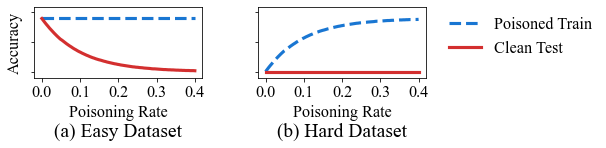

In [6]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = FONTSIZE
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=FIGSIZE)

axs[0].set_ylabel("Accuracy")
draw_lineplot(df['x'], df['y_train_a'], df['x'], df['y_test_a'], "(a) Easy Dataset", axs[0])
draw_lineplot(df['x'], df['y_train_b'], df['x'], df['y_test_b'], "(b) Hard Dataset", axs[1])

(lines, labels) = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(1, 1), loc="upper left", frameon=False)
fig.tight_layout(pad=0.3, w_pad=3)

path_fig = os.path.join(
    PATH_ROOT,
    "fake_acc.pdf",
)
plt.savefig(path_fig, dpi=300, bbox_inches="tight")
print(f"Save to: {path_fig}")